In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import os

df = pd.read_csv('../data/lawa-lake-monitoring-data-2004-2023_statetrendtli-results_sep2024.csv')


/tmp/ipykernel_2341/1607740416.py:9: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/lawa-lake-monitoring-data-2004-2023_statetrendtli-results_sep2024.csv')


In [2]:
df.head()

,DateImported,Region,Agency,LawaSiteID,SiteID,CouncilSiteID,LFENZID,Latitude,Longitude,GeomorphicLType,LTypeMixingPattern,Indicator,SampleDateTime,Timezone,Value (Agency),Symbol,Value,Units,QC (Agency),QCNEMSEquivalent
0,5-Jul-24,auckland,Auckland Council,arc-00098,Lake Tomorata,6303,21871,-36.19275,174.64901,Aeolian,Polymictic,Chl-a,2/25/04 12:00,NZST,0.0078,FALSE,7.8,mg/m3,NaN,NaN
1,5-Jul-24,auckland,Auckland Council,arc-00098,Lake Tomorata,6303,21871,-36.19275,174.64901,Aeolian,Polymictic,Chl-a,5/18/04 12:00,NZST,0.0041,FALSE,4.1,mg/m3,NaN,NaN
2,5-Jul-24,auckland,Auckland Council,arc-00098,Lake Tomorata,6303,21871,-36.19275,174.64901,Aeolian,Polymictic,Chl-a,8/20/04 12:00,NZST,0.0058,FALSE,5.8,mg/m3,NaN,NaN
3,5-Jul-24,auckland,Auckland Council,arc-00098,Lake Tomorata,6303,21871,-36.19275,174.64901,Aeolian,Polymictic,Chl-a,11/23/04 12:00,NZST,0.0045,FALSE,4.5,mg/m3,NaN,NaN
4,5-Jul-24,auckland,Auckland Council,arc-00098,Lake Tomorata,6303,21871,-36.19275,174.64901,Aeolian,Polymictic,Chl-a,1/18/05 12:00,NZST,0.0041,FALSE,4.1,mg/m3,NaN,NaN


In [3]:
indicator_thresholds = {
    'Chl-a': {
        'type': 'above',
        'moderate': 10,
        'high_threshold': 25
    }, 
    'Cyanobacteria (total volume)': {
         'type': 'above',
         'moderate': 0.2,
        'high_threshold': 4       
    },
    'Cyanobacteria (biovolume equiv of potentially toxic)': {
        'type': 'above',
        'moderate': 0.2,
        'high_threshold': 4          
    }, 
    'E. coli': {
         'type': 'above',
        'moderate': 126,
        'high_threshold': 235   
    },
    'Ammoniacal Nitrogen': {
        'type': 'above',
        'moderate': 0.5,
        'high_threshold': 1.0   
    },       
    'pH': {
        'type': 'outside_range',
        'moderate': [5.5, 9.0],
        'high_threshold': [6.5, 8.5]
    },       
    'Secchi': {
        'type': 'below',
        'moderate': 1.2,
        'high_threshold': 0.5,
    },   
    'Total Nitrogen': {
        'type': 'above',
        'moderate': 0.5,
        'high_threshold': 1.0   
    },
    'Total Phosphorus': {
        'type': 'above',
        'moderate': 0.02,
        'high_threshold': 0.05
    }
}

In [4]:
from catboost import CatBoostClassifier

/tmp/ipykernel_2341/60011655.py:15: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_2341/60011655.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['SampleDateTime'] = pd.to_datetime(df['SampleDateTime'])



Value ranges for indicators:
Chl-a: min=0.0, max=13530.0, mean=23.119513217773687
Cyanobacteria (total volume): min=0.0, max=619.7, mean=6.299108779640684
Cyanobacteria (biovolume equiv of potentially toxic): min=0.0, max=619.7, mean=5.832080336320755
E. coli: min=0.0, max=24200.0, mean=104.28799521114499
Ammoniacal Nitrogen: min=-0.008, max=17.0, mean=0.046695569620253154

Overall Risk Level Distribution:
risk_level
0    86284
2    20546
1    14431
Name: count, dtype: int64

Aggregated Daily Risk Distribution:
aggregated_risk
2    8689
0    8412
1    4687
Name: count, dtype: int64
**** visualizing Lake Tomorata
Created visualization: site_Lake Tomorata_monthly_risk_all.png
Created calendar visualization: site_Lake Tomorata_calendar_risk_all.png
**** visualizing Lake Wainamu
Created visualization: site_Lake Wainamu_monthly_risk_all.png
Created calendar visualization: site_Lake Wainamu_calendar_risk_all.png
**** visualizing Lake Pupuke
Created visualization: site_Lake Pupuke_monthly_ri

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Missing features for prediction: ['Value_mean', 'Value_max', 'Value_min', 'Value_std', 'Value_count']

Predicted risk for site Lake Tomorata in month 7: safe


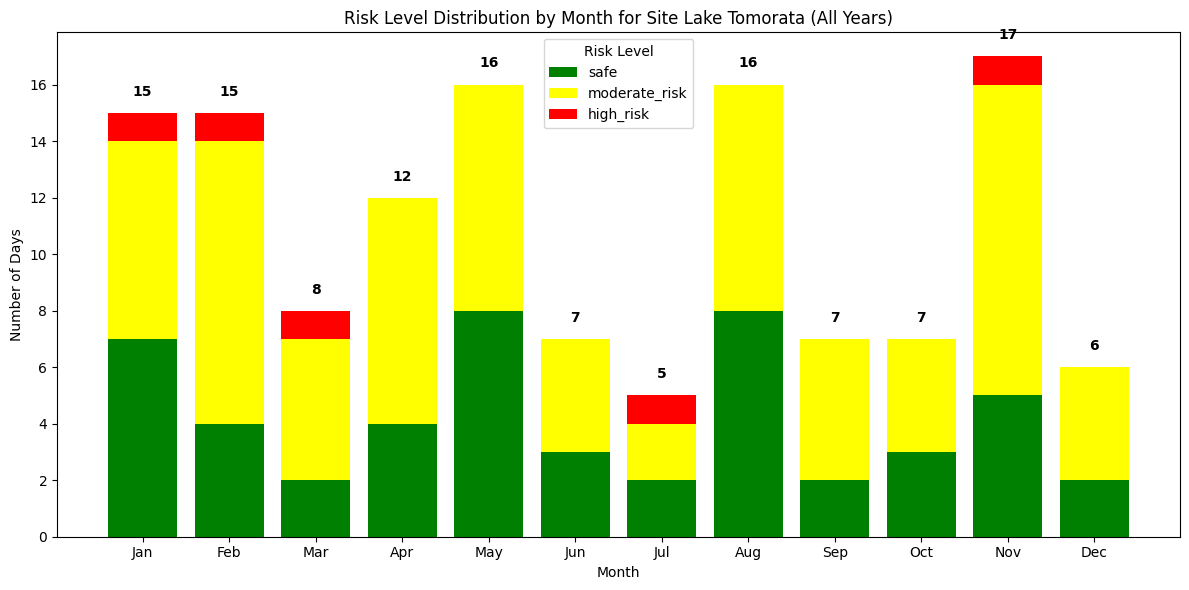

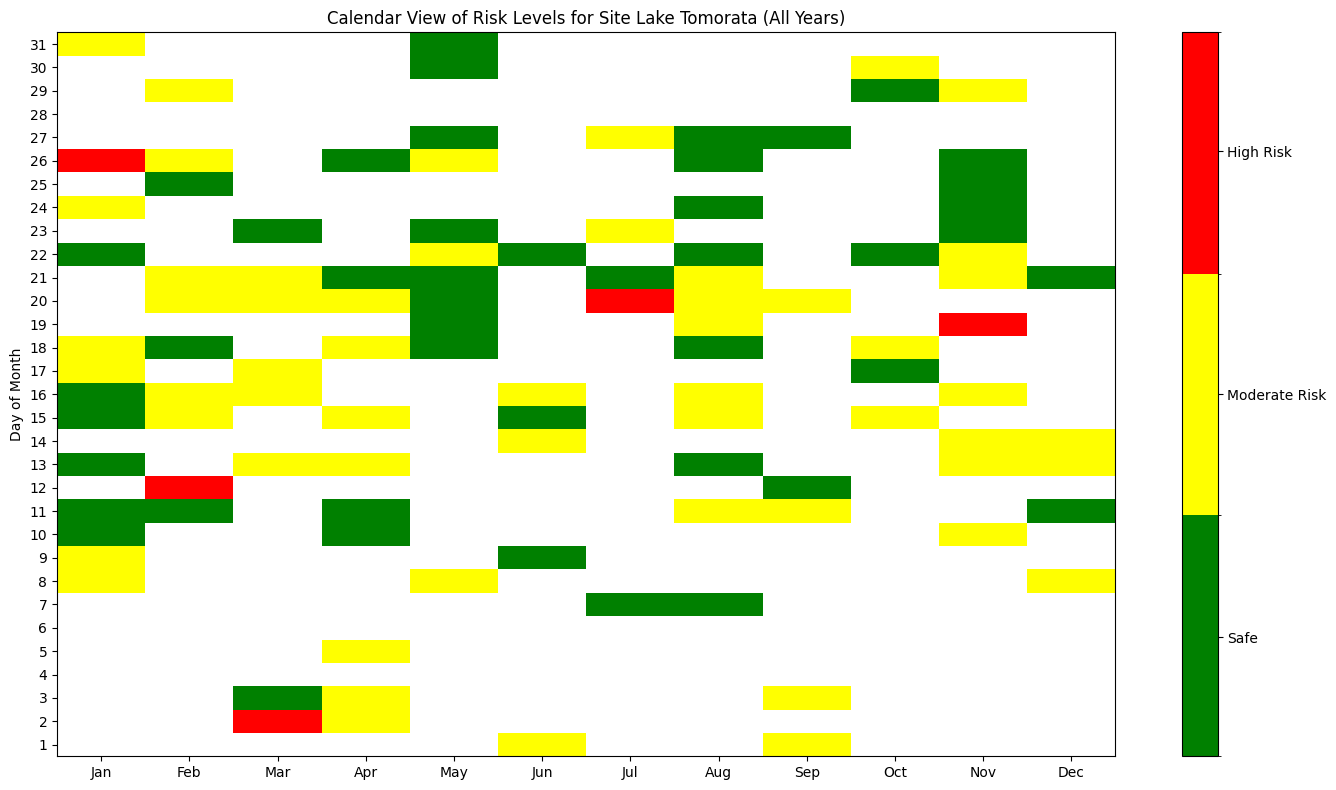

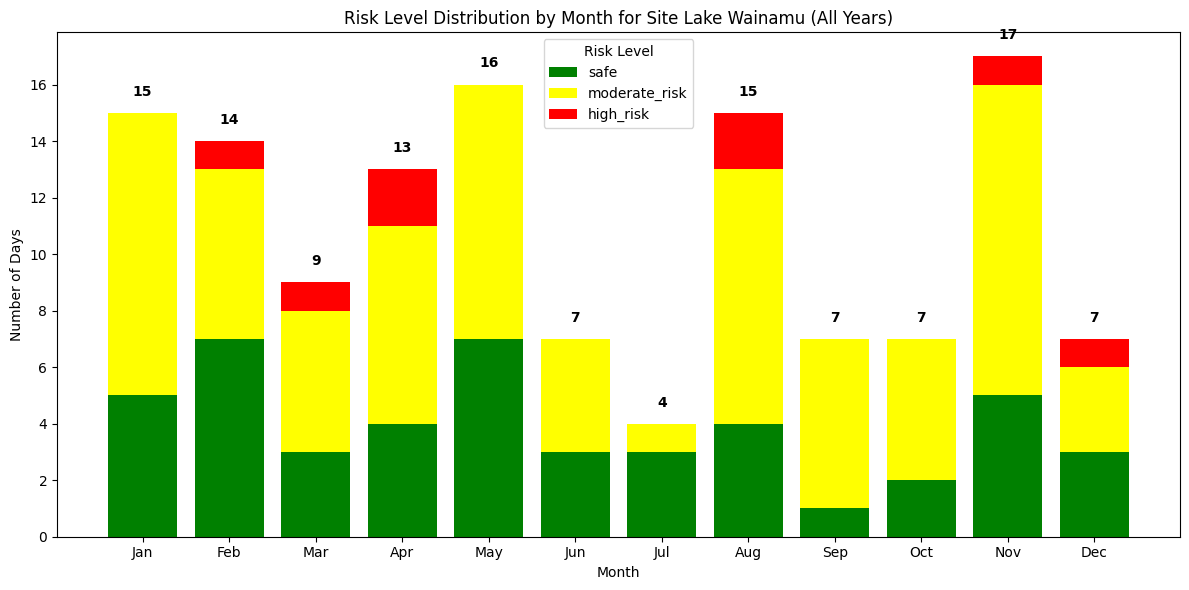

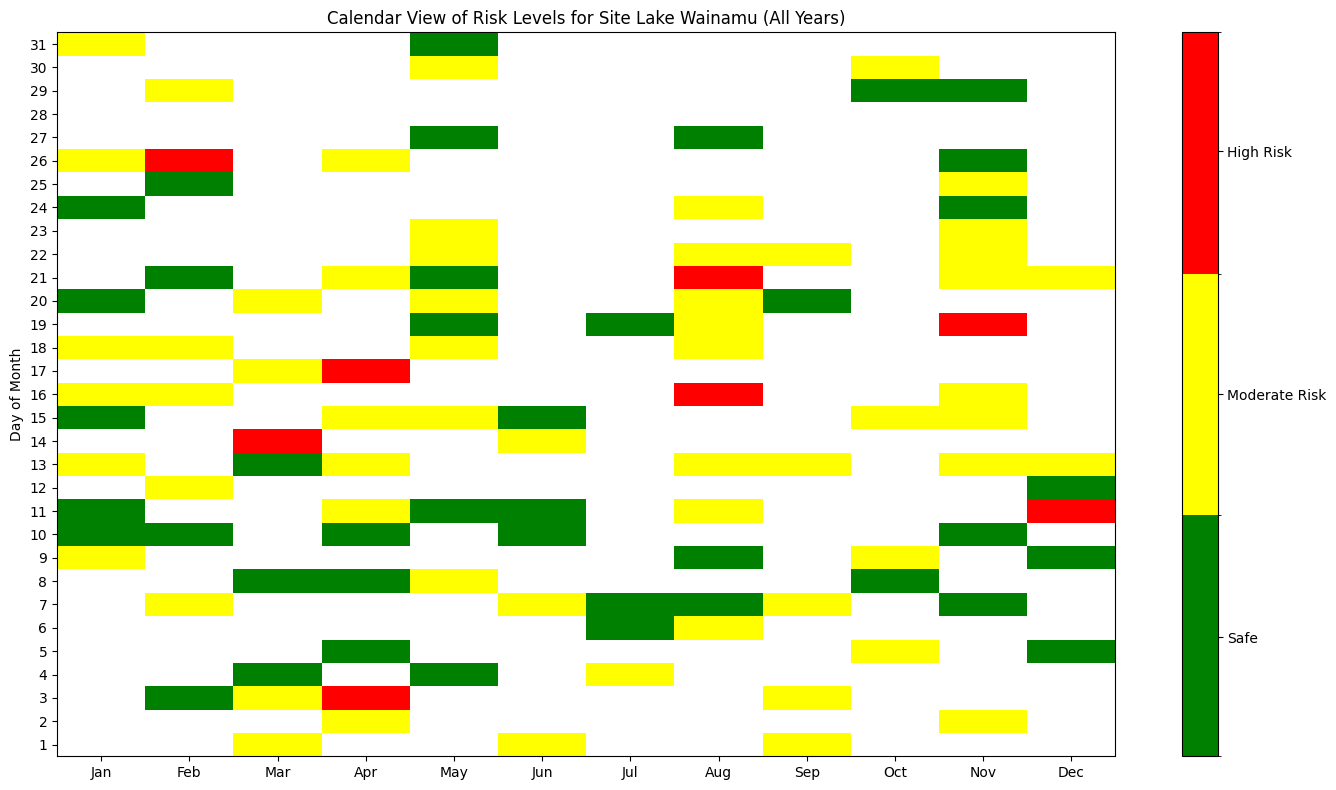

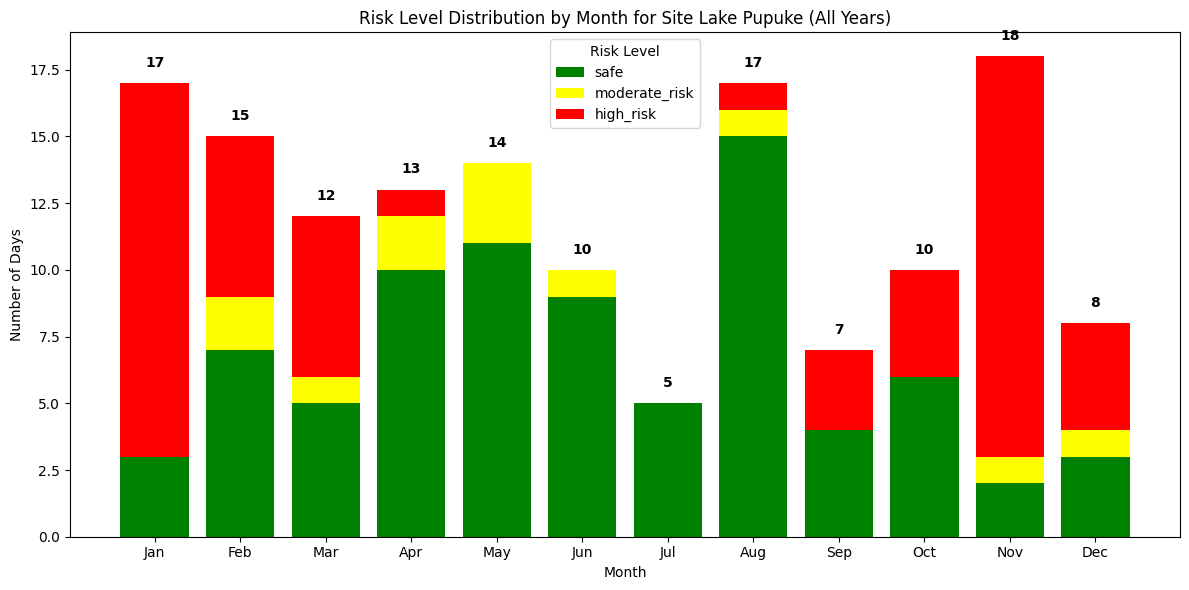

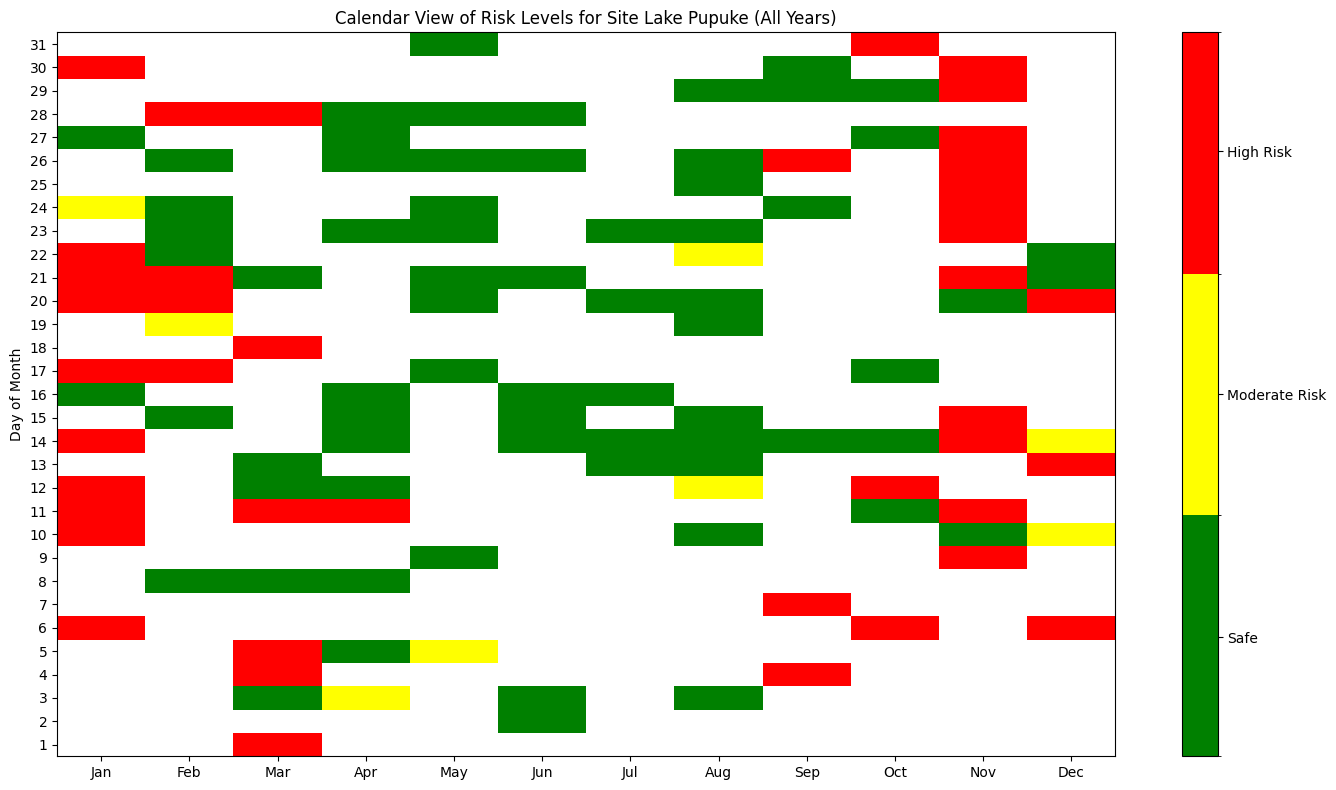

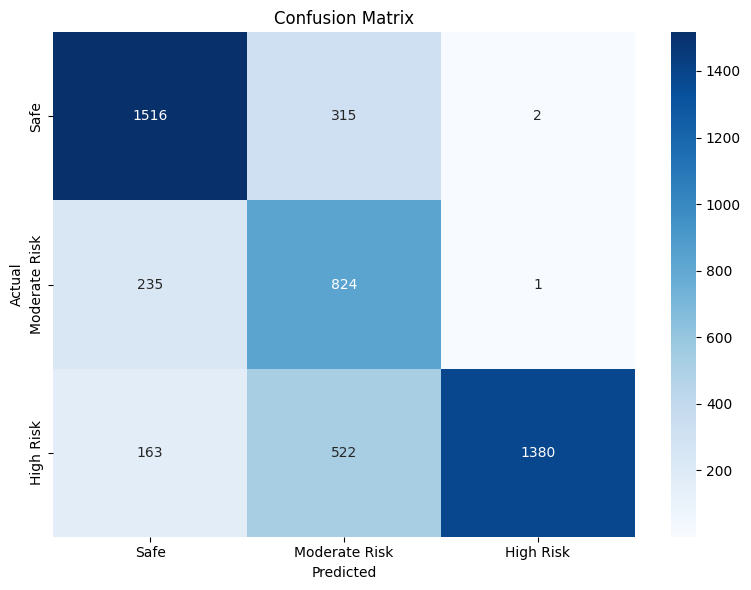

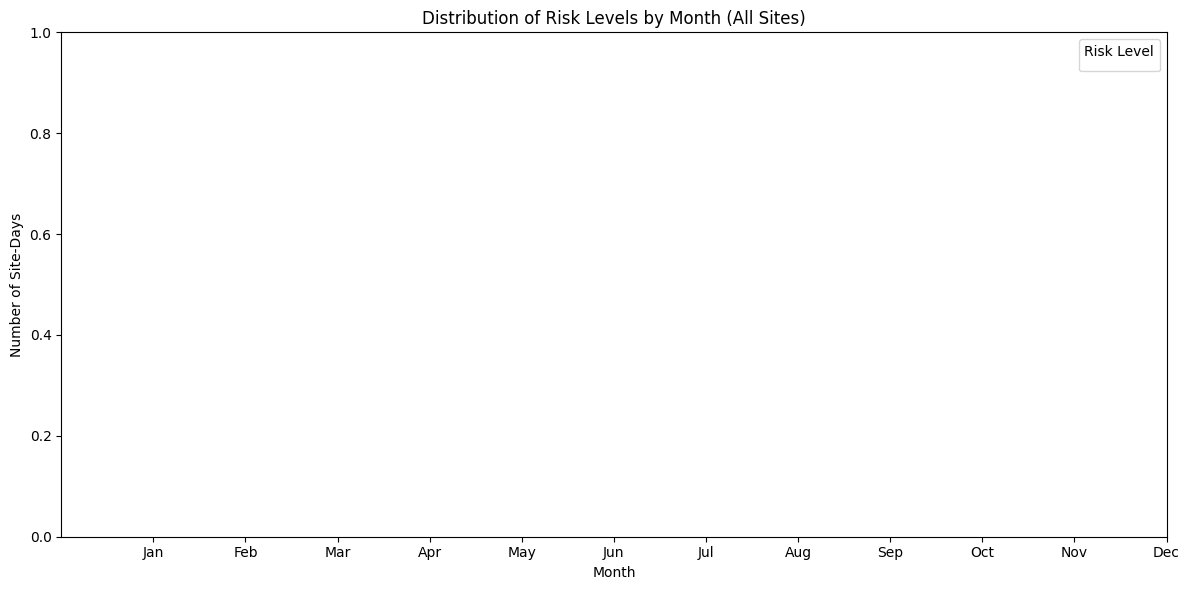

<Figure size 1200x600 with 0 Axes>

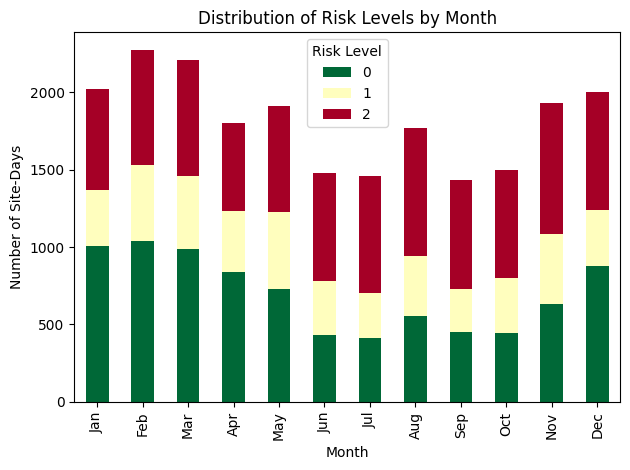

In [15]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


# Step 1: Data Loading and Preprocessing
def load_and_preprocess_data(file_path):
    """Load and preprocess the water quality dataset."""
    # Load data
    df = pd.read_csv(file_path)
    
    # Convert SampleDateTime to datetime
    df['SampleDateTime'] = pd.to_datetime(df['SampleDateTime'])
    
    # Extract date and month for analysis
    df['Date'] = df['SampleDateTime'].dt.date
    df['Month'] = df['SampleDateTime'].dt.month
    df['Year'] = df['SampleDateTime'].dt.year
    
    return df


def determine_risk_lvl(row):
    """
    Determine risk level for a single value based on indicator conditions.
    
    Returns:
    --------
    int
        Risk level (0: Safe, 1: Moderate, 2: High)
    """
    # Handle potential None or empty condition
    indicator = row['Indicator']
    condition = indicator_thresholds.get(indicator)
    value = pd.to_numeric(row['Value (Agency)'], errors='coerce')
    # print(f"finding risk value for row, value is {value}")
    if not condition or value is None:
        return 0
    
    condition_type = condition.get("type", "above")
    moderate_threshold = condition.get("moderate")
    
    # Handle both 'high_threshold' and 'threshold' keys
    high_threshold = condition.get("high_threshold") or condition.get("threshold")
    
    # Default risk is safe
    risk_level = 0
    
    # Risk determination logic for different condition types
    if condition_type == "above":
        # Prioritize high threshold if present
        if high_threshold is not None and value > high_threshold:
            risk_level = 2  # High risk
            # st.write(f"High Risk: Value {value} > High Threshold {high_threshold}")
        elif moderate_threshold is not None and value > moderate_threshold:
            risk_level = 1  # Moderate risk
            # st.write(f"Moderate Risk: Value {value} > Moderate Threshold {moderate_threshold}")
    
    elif condition_type == "below":
        # Prioritize high threshold if present
        if high_threshold is not None and value < high_threshold:
            risk_level = 2  # High risk
            # st.write(f"High Risk: Value {value} < High Threshold {high_threshold}")
        elif moderate_threshold is not None and value < moderate_threshold:
            risk_level = 1  # Moderate risk
            # st.write(f"Moderate Risk: Value {value} < Moderate Threshold {moderate_threshold}")
    
    elif condition_type == "outside_range":
        # Ensure we have a valid range for moderate and high thresholds
        if (isinstance(moderate_threshold, list) and len(moderate_threshold) == 2 and 
            isinstance(high_threshold, list) and len(high_threshold) == 2):
            
            mod_lower, mod_upper = moderate_threshold
            high_lower, high_upper = high_threshold
            
            # Check for high risk first
            if value < high_lower or value > high_upper:
                risk_level = 2  # High risk
                # st.write(f"High Risk: Value {value} outside high threshold range [{high_lower}, {high_upper}]")
            
            # Then check for moderate risk
            elif value < mod_lower or value > mod_upper:
                risk_level = 1  # Moderate risk
                # st.write(f"Moderate Risk: Value {value} outside moderate threshold range [{mod_lower}, {mod_upper}]")
    
    # st.write(f"Determined Risk Level: {risk_level}")
    return risk_level

# Step 4: Aggregate Risk by Date and Site
def aggregate_daily_risk(risk_levels, strategy='worst_case'):
    """
    Aggregate multiple risk levels into a single risk assessment.
    
    Parameters:
    - risk_levels: List of risk levels (0=safe, 1=moderate_risk, 2=high_risk)
    - strategy: 'worst_case' or 'weighted'
    
    Returns:
    - Aggregated risk level (0, 1, or 2)
    """
    # Print a sample of received risk_levels for debugging (avoid flooding logs)
    # if np.random.random() < 0.001:  # Only print about 0.1% of calls
    #     print(f"DEBUG - Aggregating risk levels: {risk_levels}")
    
    # Filter out None/NaN values
    risk_levels = [r for r in risk_levels if r is not None and not (isinstance(r, float) and np.isnan(r))]
    
    if not risk_levels:
        return 0  # Default to safe (0) if no valid levels
    
    # Convert string risk levels to integers if needed
    numeric_levels = []
    for level in risk_levels:
        if isinstance(level, (int, float)) and not np.isnan(level):
            # Already numeric, just make sure it's 0, 1, or 2
            numeric_level = int(level)
            if 0 <= numeric_level <= 2:
                numeric_levels.append(numeric_level)
            else:
                print(f"WARNING - Unexpected numeric risk level: {level}")
                numeric_levels.append(0)  # Default to safe
        elif isinstance(level, str):
            # Convert text risk level to numeric
            if level in ['0', 'safe', 'low']:
                numeric_levels.append(0)
            elif level in ['1', 'moderate', 'moderate_risk']:
                numeric_levels.append(1)
            elif level in ['2', 'high', 'high_risk']:
                numeric_levels.append(2)
            else:
                print(f"WARNING - Unexpected string risk level: {level}")
                numeric_levels.append(0)  # Default to safe
        else:
            print(f"WARNING - Cannot process risk level: {level} of type {type(level)}")
            numeric_levels.append(0)  # Default to safe
    
    if strategy == 'worst_case':
        # Return the highest risk level
        return max(numeric_levels) if numeric_levels else 0
    
    elif strategy == 'weighted':
        # Calculate average risk level
        try:
            average = sum(numeric_levels) / len(numeric_levels)
            if average >= 1.5:
                return 2  # high_risk
            elif average >= 0.5:
                return 1  # moderate_risk
            else:
                return 0  # safe
        except ZeroDivisionError:
            return 0  # Default to safe
    
    else:
        print(f"Unknown aggregation strategy: {strategy}")
        return 0  # Default to safe

#step 5
def prepare_modeling_features(df):
    """Prepare features for the prediction model."""
    # Check if the risk_level column exists
    if 'risk_level' not in df.columns:
        print("WARNING: 'risk_level' column not found in the dataframe!")
        print("Available columns:", df.columns.tolist())
        # Create a default risk level if it doesn't exist
        df['risk_level'] = 0  # Default to safe (0)
    
    # Print risk level counts
    print("Risk level counts:")
    print(df['risk_level'].value_counts())
    
    # Group by Site, Year, Month and aggregate
    try:
        monthly_features = df.groupby(['SiteID', 'Year', 'Month']).agg({
            'Value': ['mean', 'max', 'min', 'std', 'count'],
            'risk_level': lambda x: aggregate_daily_risk(list(x), strategy='worst_case')
        }).reset_index()
        
        # Flatten multi-level columns
        monthly_features.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in monthly_features.columns]
        
        # Print columns after flattening to check the actual column name
        print("Columns after flattening:", monthly_features.columns.tolist())
        
        # Find the risk level column (it might be named 'risk_level_<lambda>')
        risk_cols = [col for col in monthly_features.columns if 'risk_level' in col]
        if risk_cols:
            risk_col = risk_cols[0]
            print(f"Using risk column: {risk_col}")
            
            # Print unique values in this column to debug
            unique_values = monthly_features[risk_col].unique()
            print(f"Unique values in {risk_col}: {unique_values}")
            
            # The risk level is already numeric (0, 1, 2), so just copy it
            monthly_features['risk_level_encoded'] = monthly_features[risk_col]
            
            # Make sure it's integer type
            monthly_features['risk_level_encoded'] = monthly_features['risk_level_encoded'].astype(int)
            
            # Handle any NaN values in the encoded column
            if monthly_features['risk_level_encoded'].isna().any():
                print(f"WARNING: {monthly_features['risk_level_encoded'].isna().sum()} NaN values in risk_level_encoded")
                # Replace NaN with 'safe' (0)
                monthly_features['risk_level_encoded'] = monthly_features['risk_level_encoded'].fillna(0)
                print("NaN values replaced with 'safe' (0)")
        else:
            print("WARNING: No risk level columns found after aggregation!")
            # Create a default risk level encoded column
            monthly_features['risk_level_encoded'] = 0  # All safe
    except Exception as e:
        print(f"Error in aggregation: {e}")
        # Create a minimal dataframe with required columns
        monthly_features = pd.DataFrame({
            'SiteID': df['SiteID'].unique()[:5],
            'Year': [df['Year'].iloc[0]] * 5 if 'Year' in df.columns else [2023] * 5,
            'Month': list(range(1, 6)),
            'Value_mean': [0] * 5,
            'Value_max': [0] * 5, 
            'Value_min': [0] * 5,
            'Value_std': [0] * 5,
            'Value_count': [0] * 5,
            'risk_level': [0] * 5,  # Numeric risk level
            'risk_level_encoded': [0] * 5
        })
        print("Created fallback feature dataframe due to aggregation error")
    
    print(f"Final number of samples for modeling: {len(monthly_features)}")
    return monthly_features
    
    # Remove rows with unknown risk
    monthly_features = monthly_features[monthly_features['risk_level_encoded'] >= 0]
    
    return monthly_features

# Step 6: Build Prediction Model
def build_prediction_model(features_df):
    """Build and evaluate a model to predict risk levels by month."""
    
    print("building model type is: ", type(features_df))
    # Check if we have enough data to build a model
    if len(features_df) < 2:
        print("WARNING: Not enough data to build a model. Need at least 2 samples.")
        # Create a dummy model that always predicts 'safe'
        model = RandomForestClassifier(n_estimators=10, random_state=42)
        # Create a dummy feature and target for training
        dummy_X = pd.DataFrame({'dummy': [0, 1]})
        dummy_y = pd.Series([0, 0])  # Always predict 'safe' (0)
        model.fit(dummy_X, dummy_y)
        
        
        print("Returning a fallback model due to insufficient data.")
        return model
    
    # Find the risk level column (it might be named differently)
    risk_cols = [col for col in features_df.columns if 'risk_level' in col and col != 'risk_level_encoded']
    
    # Select features and target
    # Use columns that don't include 'risk_level' or other non-feature columns
    exclude_patterns = ['risk_level', 'SiteID', 'Year', 'Month']
    feature_cols = [col for col in features_df.columns if not any(pattern in col for pattern in exclude_patterns)]
    
    # Check if we have any feature columns
    # if not feature_cols:
    #     print("WARNING: No valid feature columns found!")
    #     print("Available columns:", features_df.columns.tolist())
    #     # Create dummy feature columns if none exist
    #     features_df['dummy_feature'] = 1.0
    #     feature_cols = ['dummy_feature']
    
    # Check if risk_level_encoded exists
    if 'risk_level_encoded' not in features_df.columns:
        print("WARNING: 'risk_level_encoded' column not found!")
        if risk_cols:
            risk_col = risk_cols[0]
            # print(f"Creating risk_level_encoded from {risk_col}")
            # Since we're working with numeric risk levels now, just copy the values
            # If they're already numeric
            if pd.api.types.is_numeric_dtype(features_df[risk_col]):
                features_df['risk_level_encoded'] = features_df[risk_col]
            else:
                # If they're text, map them
                risk_mapping = {'safe': 0, 'moderate_risk': 1, 'high_risk': 2, 'unknown': -1}
                features_df['risk_level_encoded'] = features_df[risk_col].map(risk_mapping)
        else:
            # Create a dummy target if no risk columns exist
            print("Creating a dummy risk_level_encoded column")
            features_df['risk_level_encoded'] = 0  # All safe
    
    # Make sure risk_level_encoded is integer type
    features_df['risk_level_encoded'] = features_df['risk_level_encoded'].astype(int)
    
    # Check class distribution before proceeding
    risk_counts = features_df['risk_level_encoded'].value_counts()
    # print("Risk level distribution:")
    # print(risk_counts)
    
    # If all samples are the same class, we need to artificially create some diversity
    if len(risk_counts) == 1:
        print("WARNING: All samples have the same risk level. Adding synthetic samples for diversity.")
        # Get the single existing class
        existing_class = risk_counts.index[0]
        
        # Create a synthetic sample from each row with a different class
        for other_class in [c for c in [0, 1, 2] if c != existing_class]:
            # Copy a few rows and change their class
            synthetic_samples = features_df.sample(min(5, len(features_df))).copy()
            synthetic_samples['risk_level_encoded'] = other_class
            # Add a small amount of noise to features to make them different
            for col in feature_cols:
                if pd.api.types.is_numeric_dtype(synthetic_samples[col]):
                    synthetic_samples[col] = synthetic_samples[col] * (0.9 + 0.2 * np.random.random(len(synthetic_samples)))
            
            # Add these synthetic samples to the dataset
            features_df = pd.concat([features_df, synthetic_samples])
        
        print("Updated risk level distribution after adding synthetic samples:")
        print(features_df['risk_level_encoded'].value_counts())
    
    # Select features and target
    X = features_df[feature_cols]
    y = features_df['risk_level_encoded']
    
    # Handle any NaN values in features
    X = X.fillna(X.mean())
    
    # Handle train/test splitting carefully
    print(f"Classes in dataset: {np.unique(y)}")
    print(f"Class distribution: {pd.Series(y).value_counts().to_dict()}")
    
    # For very small datasets, use a simple holdout validation
    if len(X) < 10:
        print("Very small dataset detected, using 80/20 split with no stratification")
        # Simple split with more training data
        if len(X) <= 5:
            # With extremely small datasets, use all data for training
            X_train, y_train = X, y
            X_test, y_test = X.iloc[:2], y.iloc[:2]  # Use a tiny subset for minimal testing
            print("Extremely small dataset, using all data for training")
        else:
            # Basic split for small dataset
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42, shuffle=True, stratify=None
            )
    else:
        # For larger datasets, attempt stratification
        try:
            print("Attempting stratified split")
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.25, random_state=42, stratify=y
            )
        except ValueError as e:
            print(f"Stratified split failed: {e}")
            print("Falling back to regular split")
            # Fall back to non-stratified split
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.25, random_state=42, stratify=None
            )
    
    # print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}")
    
    # Train model - use fewer estimators if data is very limited
    n_estimators = min(100, max(10, len(X_train) // 2))
    
    # Use a more appropriate model for small datasets
    if len(X_train) < 50:
        print("Small dataset detected, using DecisionTreeClassifier instead of RandomForest")
        model = DecisionTreeClassifier(max_depth=3, random_state=42)
    else:
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            random_state=42,
            class_weight='balanced',  # Handle class imbalance
            max_depth=5  # Prevent overfitting
        )
    
    # Print training set size
    print(f"Training model with {len(X_train)} samples")
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Only evaluate if we have test data
    if len(X_test) > 0:
        # Evaluate model
        y_pred = model.predict(X_test)
        
        # Print basic accuracy
        accuracy = (y_pred == y_test).mean()
        print(f"Model accuracy: {accuracy:.2f}")
        
        # For multi-class problems, show detailed metrics
        if len(np.unique(y)) > 1:
            # Show classification report
            print("Model Evaluation:")
            print(classification_report(y_test, y_pred, 
                target_names=['Safe', 'Moderate Risk', 'High Risk'],
                zero_division=0))
            
            # Confusion matrix
            try:
                cm = confusion_matrix(y_test, y_pred)
                plt.figure(figsize=(8, 6))
                # Ensure we have labels for all possible classes
                labels = ['Safe', 'Moderate Risk', 'High Risk']
                # Truncate to only include classes present in the data
                present_classes = sorted(np.unique(np.concatenate([y_test, y_pred])))
                display_labels = [labels[i] for i in present_classes]
                
                # Create heatmap
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                            xticklabels=display_labels,
                            yticklabels=display_labels)
                plt.xlabel('Predicted')
                plt.ylabel('Actual')
                plt.title('Confusion Matrix')
                plt.tight_layout()
                plt.savefig('confusion_matrix.png')
            except Exception as e:
                print(f"Error creating confusion matrix: {e}")
                import traceback
                traceback.print_exc()

    
    return model

# Step 7: Predict for New Months
def predict_risk_for_month(model, site_id, month, historical_data):
    """Predict risk level for a given site and month."""
    try:
        # Extract and prepare features from historical data
        site_data = historical_data[historical_data['SiteID'] == site_id]
        
        # Check if we have the required columns
        required_cols = ['Month', 'Value']
        missing_cols = [col for col in required_cols if col not in site_data.columns]
        if missing_cols:
            print(f"Missing required columns: {missing_cols}")
            print(f"Available columns: {site_data.columns.tolist()}")
            return "Cannot predict: missing required columns"
        
        # If we have data for this site and month, use it for prediction
        site_month_data = site_data[site_data['Month'] == month]
        
        if len(site_month_data) == 0:
            print(f"No historical data available for site {site_id} in month {month}")
            return "No historical data available for this site and month"
        
        # Prepare the features for prediction
        features = pd.DataFrame()
        
        # Check if Year column is available for grouping
        if 'Year' in site_month_data.columns:
            # Group by Year and calculate statistics
            features = site_month_data.groupby(['Year']).agg({
                'Value': ['mean', 'max', 'min', 'std', 'count']
            }).mean().reset_index()
            
            # Flatten multi-level columns
            features.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in features.columns]
        else:
            # No Year column, just calculate statistics directly
            value_stats = {
                'Value_mean': site_month_data['Value'].mean(), 
                'Value_max': site_month_data['Value'].max(),
                'Value_min': site_month_data['Value'].min(),
                'Value_std': site_month_data['Value'].std(),
                'Value_count': len(site_month_data)
            }
            features = pd.DataFrame([value_stats])
        
        # Make sure we have all the features the model was trained on
        model_features = model.feature_names_in_ if hasattr(model, 'feature_names_in_') else []
        
        # If it's our fallback model
        if len(model_features) == 1 and model_features[0] == 'dummy':
            return "safe"  # Default prediction
        
        # Check if we have the right features
        missing_features = [feat for feat in model_features if feat not in features.columns]
        
        if missing_features:
            print(f"Missing features for prediction: {missing_features}")
            # Add missing features with mean values or zeros
            for feat in missing_features:
                features[feat] = 0
        
        # Make sure we only use features the model knows about
        pred_features = features.drop('Year', axis=1) if 'Year' in features.columns else features
        pred_features = pred_features[[col for col in model_features if col in pred_features.columns]]
        
        # If we still don't have all the features, we can't make a prediction
        if len(pred_features.columns) != len(model_features):
            print(f"Cannot make prediction: have {len(pred_features.columns)} features, need {len(model_features)}")
            return "Unable to make prediction due to missing features"
        
        # Make prediction
        prediction = model.predict(pred_features)[0]
        
        # Map prediction back to risk level
        risk_mapping = {0: 'safe', 1: 'moderate_risk', 2: 'high_risk'}
        return risk_mapping.get(prediction, "unknown")
        
    except Exception as e:
        print(f"Error during prediction: {e}")
        return "Error during prediction"

# Function to visualize risk for a single site over a calendar year
def visualize_site_annual_risk(site_id, year_filter, site_date_risk):
    """
    Create a visualization of risk levels for a single site throughout a calendar year,
    aggregating data across multiple years by calendar day.
    
    Parameters:
    - site_id: The ID of the site to visualize
    - year_filter: Specific year to filter by, or None to use all years
    - site_date_risk: DataFrame with site risk data
    """
    # Filter for the specific site
    site_data = site_date_risk[site_date_risk['SiteID'] == site_id].copy()
    
    if len(site_data) == 0:
        print(f"No data available for site {site_id}")
        return
    
    # Convert dates to datetime 
    site_data['DateObj'] = pd.to_datetime(site_data['Date'])
    
    # Extract month and day (regardless of year)
    site_data['Month'] = site_data['DateObj'].dt.month
    site_data['Day'] = site_data['DateObj'].dt.day
    site_data['Year'] = site_data['DateObj'].dt.year
    
    # Filter by year if specified
    if year_filter is not None:
        site_data = site_data[site_data['Year'] == year_filter]
        title_year = f" in {year_filter}"
    else:
        title_year = " (All Years)"
    
    if len(site_data) == 0:
        print(f"No data available for site {site_id}{title_year}")
        return
    
    # Convert risk to consistent format
    if pd.api.types.is_numeric_dtype(site_data['aggregated_risk']):
        # Map numeric risk levels to text for consistency
        risk_mapping = {0: 'safe', 1: 'moderate_risk', 2: 'high_risk'}
        site_data['risk_category'] = site_data['aggregated_risk'].map(risk_mapping)
    else:
        # Already text format
        site_data['risk_category'] = site_data['aggregated_risk']
    
    # Calculate risk distribution by month
    monthly_counts = site_data.groupby('Month')['risk_category'].value_counts().unstack().fillna(0)
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    
    # Set colors for risk levels
    colors = {'safe': 'green', 'moderate_risk': 'yellow', 'high_risk': 'red', 'unknown': 'gray'}
    
    # Get available risk categories
    risk_categories = [cat for cat in ['safe', 'moderate_risk', 'high_risk', 'unknown'] 
                      if cat in monthly_counts.columns]
    
    if len(risk_categories) == 0:
        print(f"No risk categories found for site {site_id}")
        return
    
    # Create stacked bar chart
    bottom = np.zeros(len(monthly_counts))
    for category in risk_categories:
        if category in monthly_counts.columns:
            plt.bar(monthly_counts.index, monthly_counts[category], 
                   bottom=bottom, color=colors.get(category, 'blue'), label=category)
            bottom += monthly_counts[category].values
    
    # Set labels and title
    plt.xlabel('Month')
    plt.ylabel('Number of Days')
    plt.title(f'Risk Level Distribution by Month for Site {site_id}{title_year}')
    
    # Set x-axis to show month names
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    # Add legend
    plt.legend(title='Risk Level')
    
    # Add data labels on bars
    for month in monthly_counts.index:
        total = sum(monthly_counts.loc[month, cat] for cat in risk_categories if cat in monthly_counts.columns)
        if total > 0:
            plt.text(month, total + 0.5, str(int(total)), 
                     ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    
    # Save the figure
    filename = f'site_{site_id}_monthly_risk_{year_filter if year_filter else "all"}.png'
    plt.savefig(filename)
    print(f"Created visualization: {filename}")
    
    # Daily pattern visualizations
    # Create heatmap of risk by day and month
    try:
        # Convert day-month to a date string for better sorting
        site_data['MonthDay'] = site_data['DateObj'].dt.strftime('%m-%d')
        
        # Count occurrences of each risk level by day of year
        daily_data = site_data.copy()
        
        # Create a calendar visualization (12 months x 31 days)
        risk_value_map = {'safe': 0, 'moderate_risk': 1, 'high_risk': 2, 'unknown': 0.5}
        
        # Map text risk to numeric for the heatmap
        if 'risk_category' in daily_data.columns:
            daily_data['risk_value'] = daily_data['risk_category'].map(risk_value_map)
        else:
            # Use existing numeric values
            daily_data['risk_value'] = daily_data['aggregated_risk']
        
        # Create matrix for heatmap (months x days)
        # Initialize with NaN
        calendar_data = np.full((12, 31), np.nan)
        
        # Fill in with average risk values
        for m in range(1, 13):
            month_data = daily_data[daily_data['Month'] == m]
            for d in range(1, 32):
                day_data = month_data[month_data['Day'] == d]
                if len(day_data) > 0:
                    calendar_data[m-1, d-1] = day_data['risk_value'].mean()
        
        # Create calendar heatmap
        plt.figure(figsize=(14, 8))
        
        # Custom colormap: green for safe, yellow for moderate, red for high
        cmap = plt.cm.colors.ListedColormap(['green', 'yellow', 'red'])
        bounds = [0, 0.67, 1.33, 2]
        norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
        
        # Create heatmap
        heatmap = plt.pcolormesh(calendar_data.T, cmap=cmap, norm=norm)
        
        # Set labels
        plt.yticks(np.arange(0.5, 31.5), np.arange(1, 32))
        plt.xticks(np.arange(0.5, 12.5), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        
        plt.title(f'Calendar View of Risk Levels for Site {site_id}{title_year}')
        plt.ylabel('Day of Month')
        
        # Add colorbar
        cbar = plt.colorbar(heatmap)
        cbar.set_ticks([0.33, 1, 1.67])
        cbar.set_ticklabels(['Safe', 'Moderate Risk', 'High Risk'])
        
        plt.tight_layout()
        calendar_filename = f'site_{site_id}_calendar_risk_{year_filter if year_filter else "all"}.png'
        plt.savefig(calendar_filename)
        print(f"Created calendar visualization: {calendar_filename}")
    except Exception as e:
        print(f"Error creating calendar visualization: {e}")
    
    return plt.gcf()  # Return the monthly figure for displayylabel('Number of Days')
    plt.title(f'Risk Level Distribution for Site {site_id}{title_year}')
    
    # Set x-axis to show month names
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    # Add legend
    plt.legend(title='Risk Level')
    
    # Add data labels on bars
    for i, month in enumerate(monthly_risk.index):
        total = sum(monthly_risk.loc[month, risk] for risk in available_risks if risk in monthly_risk.columns)
        if total > 0:
            plt.text(month, total + 0.5, str(int(total)), 
                     ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    
    # Save the figure
    filename = f'site_{site_id}_risk_{year if year else "all"}.png'
    plt.savefig(filename)
    print(f"Created visualization: {filename}")
    
    return plt.gcf()  # Return the figure for display

# Step 8: Main Execution Function
def analyze_water_quality_risk(file_path):
    """Main function to run the complete analysis."""
    # Load and preprocess data
    df = load_and_preprocess_data(file_path)
       
    # Check for common indicators
    indicators = df['Indicator'].unique()
    
    # Check value ranges for some key indicators
    print("\nValue ranges for indicators:")
    for indicator in indicators[:min(5, len(indicators))]:
        values = df[df['Indicator'] == indicator]['Value']
        if len(values) > 0:
            try:
                numeric_values = pd.to_numeric(values, errors='coerce')
                print(f"{indicator}: min={numeric_values.min()}, max={numeric_values.max()}, mean={numeric_values.mean()}")
            except:
                print(f"{indicator}: Could not convert to numeric")
    
    # Apply risk classification
    df['risk_level'] = df.apply(lambda row: determine_risk_lvl(row), axis=1)
    
    # Count occurrences of each risk level
    risk_counts = df['risk_level'].value_counts()
    print("\nOverall Risk Level Distribution:")
    print(risk_counts)
    
    # Check if everything is being classified as 'safe'
    if risk_counts.get('safe', 0) > 0.95 * len(df):
        print("\nWARNING: More than 95% of data classified as 'safe'. This might indicate threshold issues.")
        # Print some random samples to check classifications
        sample_rows = df.sample(min(10, len(df)))
        print("\nRandom samples to check classification:")
        for _, row in sample_rows.iterrows():
            print(f"Indicator: {row['Indicator']}, Value: {row['Value']}, Risk: {row['risk_level']}")
    
    # Group by site and date to get daily risk
    site_date_risk = df.groupby(['SiteID', 'Date']).agg({
        'risk_level': lambda x: list(x)
    }).reset_index()
    
    # Apply aggregation to get single risk level per day
    site_date_risk['aggregated_risk'] = site_date_risk['risk_level'].apply(
        lambda x: aggregate_daily_risk(x, strategy='worst_case')
    )
       
    agg_risk_counts = site_date_risk['aggregated_risk'].value_counts()
    print("\nAggregated Daily Risk Distribution:")
    print(agg_risk_counts)
    
    # Create single site visualizations for the first few sites
    unique_sites = df['SiteID'].unique()
    if len(unique_sites) > 0:
        # Get the latest year in the dataset
        if 'Year' in df.columns:
            latest_year = df['Year'].max()
        else:
            # Extract year from Date column
            latest_year = pd.to_datetime(df['Date']).dt.year.max() if 'Date' in df.columns else None
        
        # Create visualizations for up to the first 3 sites
        for site in unique_sites[:min(3, len(unique_sites))]:
            print(f"**** visualizing {site}")
            try:
                visualize_site_annual_risk(site, None, site_date_risk)
            except Exception as e:
                print(f"Error creating visualization for site {site}: {e}")
    
    # Prepare data for modeling
    modeling_features = prepare_modeling_features(df)
    
    # Build prediction model
    model = build_prediction_model(modeling_features)
    
    # Example prediction for a specific site and month
    if len(df['SiteID'].unique()) > 0:
        example_site = df['SiteID'].unique()[0]
        example_month = 7  # July
        prediction = predict_risk_for_month(model, example_site, example_month, df)
        print(f"\nPredicted risk for site {example_site} in month {example_month}: {prediction}")
    
    # # Monthly risk distribution (similar to what was done before)
    try:
        monthly_risk = site_date_risk.copy()
        monthly_risk['Month'] = pd.to_datetime(monthly_risk['Date']).dt.month
        
        monthly_distribution = monthly_risk.groupby('Month')['aggregated_risk'].value_counts().unstack().fillna(0)
        
        plt.figure(figsize=(12, 6))
        colors = {'safe': 'green', 'moderate_risk': 'yellow', 'high_risk': 'red', 'unknown': 'gray'}
        
        # Use a custom colormap for different risk levels
        available_risks = [risk for risk in ['safe', 'moderate_risk', 'high_risk', 'unknown'] 
                          if risk in monthly_distribution.columns]
        
        # Create the stacked bar chart
        bottom = np.zeros(len(monthly_distribution))
        for risk in available_risks:
            if risk in monthly_distribution.columns:
                plt.bar(monthly_distribution.index, monthly_distribution[risk], bottom=bottom, 
                       color=colors.get(risk, 'blue'), label=risk)
                bottom += monthly_distribution[risk].values
        
        plt.title('Distribution of Risk Levels by Month (All Sites)')
        plt.xlabel('Month')
        plt.ylabel('Number of Site-Days')
        plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        plt.legend(title='Risk Level')
        plt.tight_layout()
        plt.savefig('monthly_risk_distribution.png')
    except Exception as e:
        print(f"Error creating monthly distribution: {e}")
    
    return {
        'data': df,
        'site_date_risk': site_date_risk,
        'model': model
    }

results = analyze_water_quality_risk('../data/lawa-lake-monitoring-data-2004-2023_statetrendtli-results_sep2024.csv')

# Additional analysis can be performed here with the returned results
# For example, to get the distribution of risk by month:
monthly_risk = results['site_date_risk'].copy()
monthly_risk['Month'] = pd.to_datetime(monthly_risk['Date']).dt.month

monthly_distribution = monthly_risk.groupby('Month')['aggregated_risk'].value_counts().unstack().fillna(0)

plt.figure(figsize=(12, 6))
monthly_distribution.plot(kind='bar', stacked=True, colormap='RdYlGn_r')
plt.title('Distribution of Risk Levels by Month')
plt.xlabel('Month')
plt.ylabel('Number of Site-Days')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Risk Level')
plt.tight_layout()
# plt.savefig('monthly_risk_distribution.png')
plt.show()

In [16]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from catboost import CatBoostClassifier

# Step 1: Data Loading and Preprocessing
def load_and_preprocess_data(file_path):
    """Load and preprocess the water quality dataset."""
    # Load data
    df = pd.read_csv(file_path)
    
    # Convert SampleDateTime to datetime
    df['SampleDateTime'] = pd.to_datetime(df['SampleDateTime'])
    
    # Extract date and month for analysis
    df['Date'] = df['SampleDateTime'].dt.date
    df['Month'] = df['SampleDateTime'].dt.month
    df['Year'] = df['SampleDateTime'].dt.year
    
    return df

def determine_risk_level(row):
    """
    Determine risk level for a single value based on indicator conditions.
    
    Returns:
    --------
    int
        Risk level (0: Safe, 1: Moderate, 2: High)
    """
    # Handle potential None or empty condition
    indicator = row['Indicator']
    condition = indicator_thresholds.get(indicator)
    value = pd.to_numeric(row['Value (Agency)'], errors='coerce')
    # print(f"finding risk value for row, value is {value}")
    if not condition or value is None:
        return 0
    
    condition_type = condition.get("type", "above")
    moderate_threshold = condition.get("moderate")
    
    # Handle both 'high_threshold' and 'threshold' keys
    high_threshold = condition.get("high_threshold") or condition.get("threshold")
    
    # Default risk is safe
    risk_level = 0
    
    # Risk determination logic for different condition types
    if condition_type == "above":
        # Prioritize high threshold if present
        if high_threshold is not None and value > high_threshold:
            risk_level = 2  # High risk
            # st.write(f"High Risk: Value {value} > High Threshold {high_threshold}")
        elif moderate_threshold is not None and value > moderate_threshold:
            risk_level = 1  # Moderate risk
            # st.write(f"Moderate Risk: Value {value} > Moderate Threshold {moderate_threshold}")
    
    elif condition_type == "below":
        # Prioritize high threshold if present
        if high_threshold is not None and value < high_threshold:
            risk_level = 2  # High risk
            # st.write(f"High Risk: Value {value} < High Threshold {high_threshold}")
        elif moderate_threshold is not None and value < moderate_threshold:
            risk_level = 1  # Moderate risk
            # st.write(f"Moderate Risk: Value {value} < Moderate Threshold {moderate_threshold}")
    
    elif condition_type == "outside_range":
        # Ensure we have a valid range for moderate and high thresholds
        if (isinstance(moderate_threshold, list) and len(moderate_threshold) == 2 and 
            isinstance(high_threshold, list) and len(high_threshold) == 2):
            
            mod_lower, mod_upper = moderate_threshold
            high_lower, high_upper = high_threshold
            
            # Check for high risk first
            if value < high_lower or value > high_upper:
                risk_level = 2  # High risk
                # st.write(f"High Risk: Value {value} outside high threshold range [{high_lower}, {high_upper}]")
            
            # Then check for moderate risk
            elif value < mod_lower or value > mod_upper:
                risk_level = 1  # Moderate risk
                # st.write(f"Moderate Risk: Value {value} outside moderate threshold range [{mod_lower}, {mod_upper}]")
    
    # st.write(f"Determined Risk Level: {risk_level}")
    return risk_level

def aggregate_risk_by_date(df):
    print("Available columns:", df.columns.tolist())

    # First let's make sure we have a single date column to work with
    if 'Date' not in df.columns:
        # Create Date from Year, Month, Day if needed
        df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

    # First ensure 'Date' is in datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract Year, Month, and Day components
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day

    # Now aggregate to get the maximum risk level for each site and date
    aggregated_df = df.groupby(['SiteID', 'Date']).agg({
        'risk_level': 'max',  # Take highest risk from any indicator
        'Value': ['mean', 'min', 'max'],  # Aggregate value metrics
        # Include other columns you want to keep
        'Year': 'first',
        'Month': 'first',
        'Day': 'first'
    }).reset_index()

    # Flatten multi-level column names
    aggregated_df.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in aggregated_df.columns]

    print(f"Original data: {len(df)} rows")
    print(f"Aggregated data: {len(aggregated_df)} rows")
    print(f"Unique site-date combinations: {df.groupby(['SiteID', 'Date']).ngroups}")

    # Verify our aggregation worked as expected
    print("Risk level distribution before aggregation:")
    print(df['risk_level'].value_counts())
    print("aggregated df columns:", aggregated_df.columns.tolist())
    aggregated_df = aggregated_df.rename(columns={'risk_level_max': 'risk_level'})
    aggregated_df = aggregated_df.rename(columns={'Day_first': 'Day'})
    aggregated_df = aggregated_df.rename(columns={'Month_first': 'Month'})
    aggregated_df = aggregated_df.rename(columns={'Year_first': 'Year'})
    print("Risk level distribution after taking max per site-date:")

    print(aggregated_df['risk_level'].value_counts())
    return aggregated_df

def build_model_aggregated_dataset(df):

    # Convert categorical features to appropriate format
    df['SiteID'] = df['SiteID'].astype('category')
    df['Month'] = df['Month'].astype('category')


    # Check the range of years in your dataset
    min_year = df['Year'].min()
    max_year = df['Year'].max()
    unique_years = sorted(df['Year'].unique())

    print(f"Years in dataset: {unique_years}")
    print(f"Range: {min_year} to {max_year} ({len(unique_years)} years)")

    # Calculate a good split point (e.g., use the last 20-25% of years for testing)
    # num_years = len(unique_years)
    # split_index = int(num_years * 0.8)  # Use 80% of years for training
    # split_year = unique_years[split_index]

    # print(f"Suggested split: Train on {unique_years[:split_index]} (years before {split_year})")
    # print(f"                 Test on {unique_years[split_index:]} (years {split_year} and after)")

    # # Create the train/test split
    # train_data = df[df['Year'] < split_year]
    # test_data = df[df['Year'] >= split_year]

    # print(f"Training data: {len(train_data)} samples from years {train_data['Year'].min()}-{train_data['Year'].max()}")
    # print(f"Testing data: {len(test_data)} samples from years {test_data['Year'].min()}-{test_data['Year'].max()}")

    # Alternative approach for imbalanced years: split by percentage of total data
    df_sorted = df.sort_values(['Year', 'Month'])
    train_size = 0.8
    train_data = df_sorted.iloc[:int(len(df_sorted) * train_size)]
    test_data = df_sorted.iloc[int(len(df_sorted) * train_size):]
    print(f"Alternative - Training data: years {train_data['Year'].min()}-{train_data['Year'].max()}")
    print(f"Alternative - Testing data: years {test_data['Year'].min()}-{test_data['Year'].max()}")

    # Create feature and target variables for training
    X_train = train_data.drop('risk_level', axis=1)  # Remove target column
    y_train = train_data['risk_level']               # Just the target column

    # Create feature and target variables for testing
    X_test = test_data.drop('risk_level', axis=1)
    y_test = test_data['risk_level']

    # Specify categorical features for CatBoost
    categorical_features = ['SiteID', 'Month']  # Add any other categorical columns

    # Now train the model
    model = CatBoostClassifier(
        iterations=500,
        learning_rate=0.1,
        cat_features=categorical_features,
        random_seed=42
    )

    # Fit the model
    model.fit(
        X_train, y_train,
        eval_set=(X_test, y_test),
        verbose=100
    )

    # Evaluate performance
    from sklearn.metrics import classification_report, confusion_matrix

    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    return model


df = load_and_preprocess_data('../data/lawa-lake-monitoring-data-2004-2023_statetrendtli-results_sep2024.csv')
df['risk_level'] = df.apply(determine_risk_level, axis=1)
aggregated_df = aggregate_risk_by_date(df)
model = build_model_aggregated_dataset(aggregated_df)


/tmp/ipykernel_2341/3191343620.py:15: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_2341/3191343620.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['SampleDateTime'] = pd.to_datetime(df['SampleDateTime'])


Available columns: ['DateImported', 'Region', 'Agency', 'LawaSiteID', 'SiteID', 'CouncilSiteID', 'LFENZID', 'Latitude', 'Longitude', 'GeomorphicLType', 'LTypeMixingPattern', 'Indicator', 'SampleDateTime', 'Timezone', 'Value (Agency)', 'Symbol', 'Value', 'Units', 'QC (Agency)', 'QCNEMSEquivalent', 'Date', 'Month', 'Year', 'risk_level']
Original data: 121261 rows
Aggregated data: 21788 rows
Unique site-date combinations: 21788
Risk level distribution before aggregation:
risk_level
0    86284
2    20546
1    14431
Name: count, dtype: int64
aggregated df columns: ['SiteID', 'Date', 'risk_level_max', 'Value_mean', 'Value_min', 'Value_max', 'Year_first', 'Month_first', 'Day_first']
Risk level distribution after taking max per site-date:
risk_level
2    8689
0    8412
1    4687
Name: count, dtype: int64
Years in dataset: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2025]
Range: 2004 to 2025 (21 years)
Alternative - Tr

In [ ]:
df.head(10)

In [ ]:
# Call the function with your site and thresholds
plot_aggregated_calendar_exceedances(df, "Lake Heather at centre", indicator_thresholds)